Accuracy: 0.6
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.67      0.71        15
           1       0.29      0.40      0.33         5

    accuracy                           0.60        20
   macro avg       0.53      0.53      0.52        20
weighted avg       0.65      0.60      0.62        20



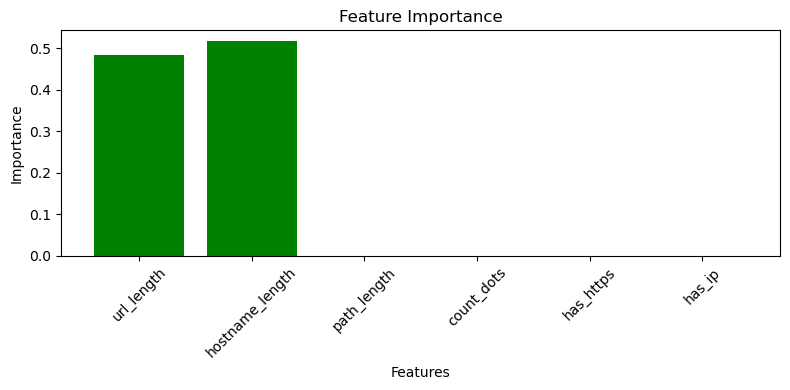

In [13]:
import pandas as pd
import random
from urllib.parse import urlparse
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Шаг 1: Загрузка данных
df = pd.read_csv("web.csv")

# Если столбца "label" нет — создаём случайные метки
if "label" not in df.columns:
    df["label"] = [random.randint(0, 1) for _ in range(len(df))]

# Шаг 2: Извлечение признаков
def extract_features(url):
    parsed = urlparse(url)
    hostname = parsed.netloc

    def is_ip(host):
        parts = host.split('.')
        return len(parts) == 4 and all(p.isdigit() and 0 <= int(p) <= 255 for p in parts)

    return {
        "url_length": len(url),
        "hostname_length": len(hostname),
        "path_length": len(parsed.path),
        "count_dots": url.count('.'),
        "has_https": int(parsed.scheme == "https"),
        "has_ip": int(is_ip(hostname))
    }

# Применяем функцию к каждому URL
features = df["url"].apply(lambda x: pd.Series(extract_features(x)))
df_features = pd.concat([features, df["label"]], axis=1)

# Шаг 3: Разделение на обучающую и тестовую выборки
X = df_features.drop("label", axis=1)
y = df_features["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Шаг 4: Обучение модели
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Шаг 5: Предсказание и оценка
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Шаг 6: Визуализация важности признаков
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 4))
plt.bar(feature_names, importances, color="green")
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
